In [1]:
# test find_subpixel_position

In [2]:
from pylab import *
%matplotlib inline

In [3]:
from openpiv.pyprocess import find_first_peak, find_second_peak, find_subpixel_peak_position
from openpiv.pyprocess import extended_search_area_piv, correlate_windows
from scipy.ndimage import shift
from scipy.ndimage.filters import gaussian_filter

/tmp/ipykernel_1212603/1798919731.py:4: DeprecationWarning: Please use `gaussian_filter` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  from scipy.ndimage.filters import gaussian_filter


In [4]:
from test_process import create_pair

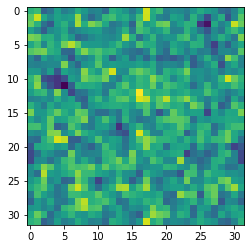

In [5]:
a = np.random.randn(32,32)
a = gaussian_filter(a,.5)

u0 = 2.8  # to the right
v0 = -5.3 # downwards

b = shift(a,(-v0, u0),mode='wrap')
plt.imshow(b)

In [6]:
u,v = extended_search_area_piv(a,b,window_size=32)

ValueError: too many values to unpack (expected 2)

In [ ]:
print(u-u0,v-v0)

[[-0.00271353]] [[0.01545332]]


In [ ]:
corr = correlate_windows(a,b)# + correlate_windows(c,d)
from scipy.ndimage.filters import gaussian_filter

corr = gaussian_filter(corr,1.5)

x,y = np.meshgrid(np.arange(corr.shape[0]),np.arange(corr.shape[1]))

In [ ]:
x1, y1, p1 = find_first_peak(corr)

In [ ]:
x2, y2, p2 = find_second_peak(corr)

In [ ]:
(i,j) = find_subpixel_peak_position(corr)

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x,y,corr);
ax.scatter(j,i,p1,'o',color='r')

In [ ]:
x1,y1,p1,x2,y2,p2,i,j 

(26,
 28,
 60.07128420968547,
 23,
 28,
 20.830743171795604,
 25.74341384564399,
 28.189462289160172)

In [ ]:
32-i

6.256586154356011

In [ ]:
32-j

3.810537710839828